In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import yt
%matplotlib notebook

## No potential - 1D density profile

#### To swap between no potentail and quadratic potential change prescribe_grav_potential.cpp line 35 and inputs line 122.  

yt : [INFO     ] 2019-05-17 16:37:39,492 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-17 16:37:39,494 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:37:39,495 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:37:39,496 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:37:39,525 Parameters: current_time              = 2.01941151592212
yt : [INFO     ] 2019-05-17 16:37:39,526 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:37:39,527 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:37:39,528 Parameters: domain_right_edge         = [1. 1. 1.]


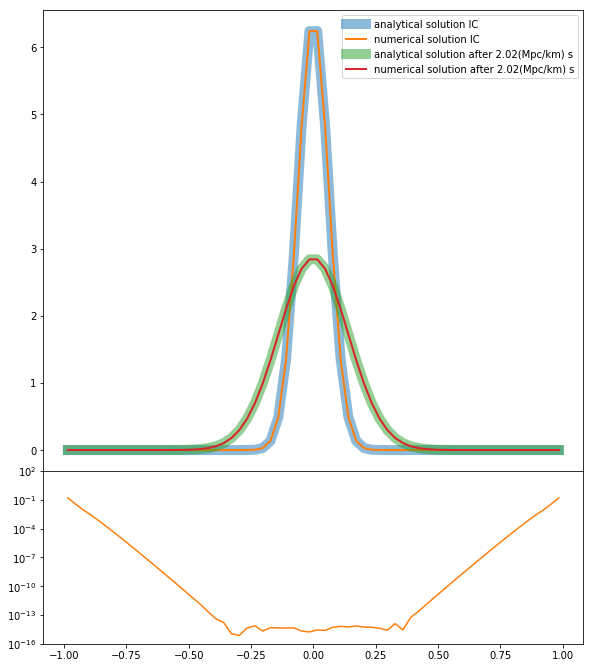

In [5]:
ds = yt.load("plt_gauss_no_gravity00000")
ds2 = yt.load("plt_gauss_no_gravity00100")
ad = ds.all_data()
ad2 = ds2.all_data()
list1 = ad[("boxlib","AxDens")]
list2 = ad2[("boxlib","AxDens")]
time1 = ds.current_time
time2 = ds2.current_time
del_t = float(time2 - time1)
xlo = ds.domain_left_edge[0]
xhi = ds.domain_right_edge[0]
boxsize = float(xhi - xlo)
N=int(int(len(list1))**(1/3)+0.5)

gamma =0.01917152/2.5
sigmaR = 0.05

hbaroverm = 0.01917152/2.5
omega = 1.0
igp =0.0

density1 = np.zeros((N,N,N))
density2 = np.zeros((N,N,N))

for i in range(0, N):
    for j in range(0, N):
        for k in range(0, N):
            density1[i,j,k]=list1[N*(N*i+k)+j]
            density2[i,j,k]=list2[N*(N*i+k)+j]
x_range = np.arange(float(xlo)+0.5*float(boxsize/N), float(xhi)+0.5*float(boxsize/N), float(boxsize/N))
            
## Analytical solution - no potential 
ana_dens = [np.exp(-((x-igp)**2)*omega/hbaroverm)*np.sqrt(omega/np.pi/hbaroverm) for x in x_range]
ana_dens2 = [np.sqrt(omega/np.pi/hbaroverm/(1+(del_t*omega)**2))*np.exp(-(x-igp)**2*omega/gamma/(1+(del_t*omega)**2))   for x in x_range]

fig = plt.figure()
left, width = 0.07, 1.25
bottom, height, height2 = 0.1, 1.6, .6
bottom_h = bottom + height2

topplot = plt.axes([left, bottom_h, width, height])
botplot = plt.axes([left, bottom, width, height2])

topplot.plot(x_range, ana_dens, linewidth=10, alpha=0.5, label="analytical solution IC")
topplot.plot(x_range, density1[:,int(N/2),int(N/2)], linewidth=2, label="numerical solution IC")
botplot.plot(x_range, abs(density1[:,int(N/2),int(N/2)]-ana_dens)/ana_dens)

topplot.plot(x_range, ana_dens2, '-', linewidth=10, alpha=0.5, label="analytical solution after "+"{0:.2f}".format(del_t)+"(Mpc/km) s")
topplot.plot(x_range, density2[:,int(N/2),int(N/2)], linewidth=2, label="numerical solution after "+"{0:.2f}".format(del_t)+"(Mpc/km) s")
botplot.plot(x_range, abs(density2[:,int(N/2),int(N/2)]-ana_dens2)/ana_dens2)

botplot.set_yscale('log')
botplot.set_ylim([1e-16,100])
topplot.legend(loc =1)
plt.show()


## Quadratic potential - 1D density profile

yt : [INFO     ] 2019-05-17 16:38:01,844 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-17 16:38:01,845 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:01,846 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:01,847 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:01,872 Parameters: current_time              = 1.55029676517408
yt : [INFO     ] 2019-05-17 16:38:01,874 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:01,877 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:01,879 Parameters: domain_right_edge         = [1. 1. 1.]


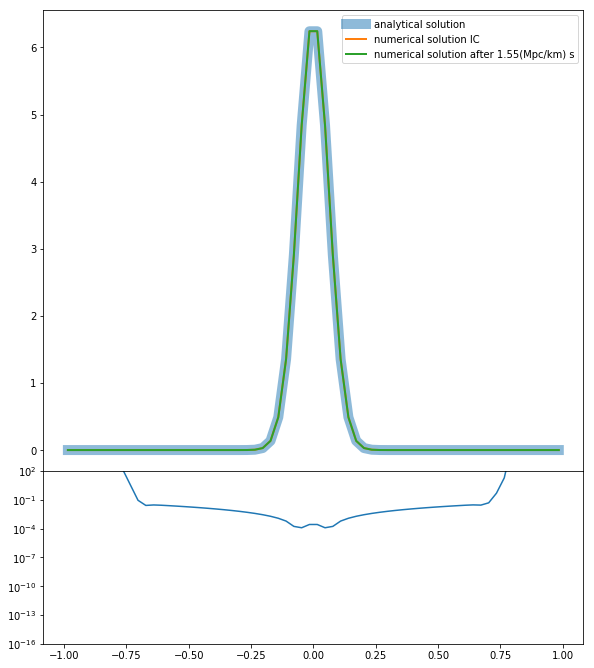

In [6]:
ds = yt.load("plt_gauss_quadpot00000")
ds2 = yt.load("plt_gauss_quadpot00100")
ad = ds.all_data()
ad2 = ds2.all_data()
list1 = ad[("boxlib","AxDens")]
list2 = ad2[("boxlib","AxDens")]
time1 = ds.current_time
time2 = ds2.current_time
del_t = float(time2 - time1) 
xlo = ds.domain_left_edge[0]
xhi = ds.domain_right_edge[0]
boxsize = float(xhi - xlo)
N=int(int(len(list1))**(1/3)+0.5)

hbaroverm = 0.01917152/2.5
omega = 1.0
igp =0.0

density1 = np.zeros((N,N,N))
density2 = np.zeros((N,N,N))

for i in range(0, N):
    for j in range(0, N):
        for k in range(0, N):
            density1[i,j,k]=list1[N*(N*i+k)+j]
            density2[i,j,k]=list2[N*(N*i+k)+j]
x_range = np.arange(float(xlo)+0.5*float(boxsize/N), float(xhi)+0.5*float(boxsize/N), float(boxsize/N))
            
## Analytical solution - quadtratic potential 
ana_dens = [np.exp(-((x-igp)**2)*omega/hbaroverm)*np.sqrt(omega/np.pi/hbaroverm) for x in x_range]


fig = plt.figure()
left, width = 0.07, 1.25
bottom, height, height2 = 0.1, 1.6, .6
bottom_h = bottom + height2

topplot = plt.axes([left, bottom_h, width, height])
botplot = plt.axes([left, bottom, width, height2])

topplot.plot(x_range, ana_dens, linewidth=10, alpha=0.5, label="analytical solution")
topplot.plot(x_range, density1[:,int(N/2),int(N/2)], linewidth=2, label="numerical solution IC")
topplot.plot(x_range, density2[:,int(N/2),int(N/2)], linewidth=2, label="numerical solution after "+"{0:.2f}".format(del_t)+"(Mpc/km) s")

botplot.plot(x_range, abs(density2[:,int(N/2),int(N/2)]-ana_dens)/ana_dens)

botplot.set_yscale('log')
botplot.set_ylim([1e-16,100])
topplot.legend(loc=1)
plt.show()

## Deviation from the analytical solution in the center with time 

yt : [INFO     ] 2019-05-17 16:38:20,574 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-17 16:38:20,575 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:20,576 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:20,577 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:20,757 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-17 16:38:20,758 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:20,759 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:20,760 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:20,943 Parameters: current_time              = 0.01
yt : [INFO     ] 2019-05-17 16:38:20,944 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:20,945 Parameters: domain_left_edge          = [-1. -1. -1.]

yt : [INFO     ] 2019-05-17 16:38:25,310 Parameters: current_time              = 0.299886661333316
yt : [INFO     ] 2019-05-17 16:38:25,312 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:25,319 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:25,321 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:25,650 Parameters: current_time              = 0.315714637331301
yt : [INFO     ] 2019-05-17 16:38:25,651 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:25,651 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:25,652 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:25,831 Parameters: current_time              = 0.331542613329285
yt : [INFO     ] 2019-05-17 16:38:25,832 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:25,833 Parameters: 

yt : [INFO     ] 2019-05-17 16:38:29,701 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:29,913 Parameters: current_time              = 0.648102133288972
yt : [INFO     ] 2019-05-17 16:38:29,914 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:29,914 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:29,915 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:30,097 Parameters: current_time              = 0.663930109286957
yt : [INFO     ] 2019-05-17 16:38:30,098 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:30,099 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:30,101 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:30,288 Parameters: current_time              = 0.679758085284941
yt : [INFO     ] 2019-05-17 16:38:30,289 Parameters: 

yt : [INFO     ] 2019-05-17 16:38:34,535 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:34,536 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:34,781 Parameters: current_time              = 0.996317605244628
yt : [INFO     ] 2019-05-17 16:38:34,782 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:34,786 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:34,792 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:35,080 Parameters: current_time              = 1.01214558124261
yt : [INFO     ] 2019-05-17 16:38:35,081 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:35,085 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:35,086 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:35,494 Parameters: curre

yt : [INFO     ] 2019-05-17 16:38:40,100 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:40,101 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:40,102 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:40,303 Parameters: current_time              = 1.34453307720029
yt : [INFO     ] 2019-05-17 16:38:40,304 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:40,305 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:40,306 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:40,495 Parameters: current_time              = 1.36036105319827
yt : [INFO     ] 2019-05-17 16:38:40,496 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:40,498 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:40,499 Parameters: domain

yt : [INFO     ] 2019-05-17 16:38:44,562 Parameters: current_time              = 1.67692057315796
yt : [INFO     ] 2019-05-17 16:38:44,563 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:44,564 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:44,564 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:44,741 Parameters: current_time              = 1.69274854915594
yt : [INFO     ] 2019-05-17 16:38:44,742 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:44,742 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:44,745 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:44,931 Parameters: current_time              = 1.70857652515393
yt : [INFO     ] 2019-05-17 16:38:44,932 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:44,933 Parameters: dom

yt : [INFO     ] 2019-05-17 16:38:49,166 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:49,446 Parameters: current_time              = 2.02513604511362
yt : [INFO     ] 2019-05-17 16:38:49,447 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:49,449 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:49,451 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:49,645 Parameters: current_time              = 2.0409640211116
yt : [INFO     ] 2019-05-17 16:38:49,647 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:49,649 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:49,651 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:49,863 Parameters: current_time              = 2.05679199710959
yt : [INFO     ] 2019-05-17 16:38:49,864 Parameters: doma

yt : [INFO     ] 2019-05-17 16:38:53,678 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:53,679 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:53,857 Parameters: current_time              = 2.37335151706928
yt : [INFO     ] 2019-05-17 16:38:53,858 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:53,859 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:53,862 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:54,052 Parameters: current_time              = 2.38917949306726
yt : [INFO     ] 2019-05-17 16:38:54,053 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:54,054 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:54,055 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:54,244 Parameters: curren

yt : [INFO     ] 2019-05-17 16:38:58,061 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:58,062 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:58,065 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:58,242 Parameters: current_time              = 2.72156698902493
yt : [INFO     ] 2019-05-17 16:38:58,243 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:58,244 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:58,245 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:38:58,418 Parameters: current_time              = 2.73739496502292
yt : [INFO     ] 2019-05-17 16:38:58,419 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:38:58,420 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:38:58,424 Parameters: domain

yt : [INFO     ] 2019-05-17 16:39:02,439 Parameters: current_time              = 3.05395448498261
yt : [INFO     ] 2019-05-17 16:39:02,439 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:02,440 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:02,442 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:02,624 Parameters: current_time              = 3.06978246098059
yt : [INFO     ] 2019-05-17 16:39:02,625 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:02,626 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:02,626 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:02,809 Parameters: current_time              = 3.08561043697858
yt : [INFO     ] 2019-05-17 16:39:02,810 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:02,812 Parameters: dom

yt : [INFO     ] 2019-05-17 16:39:06,649 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:06,823 Parameters: current_time              = 3.40216995693827
yt : [INFO     ] 2019-05-17 16:39:06,823 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:06,824 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:06,825 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:07,004 Parameters: current_time              = 3.41799793293625
yt : [INFO     ] 2019-05-17 16:39:07,005 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:07,006 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:07,008 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:07,183 Parameters: current_time              = 3.43382590893424
yt : [INFO     ] 2019-05-17 16:39:07,184 Parameters: dom

yt : [INFO     ] 2019-05-17 16:39:10,910 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:10,913 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:11,097 Parameters: current_time              = 3.75038542889393
yt : [INFO     ] 2019-05-17 16:39:11,098 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:11,099 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:11,101 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:11,284 Parameters: current_time              = 3.76621340489191
yt : [INFO     ] 2019-05-17 16:39:11,285 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:11,286 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:11,287 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:11,472 Parameters: curren

yt : [INFO     ] 2019-05-17 16:39:15,231 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:15,232 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:15,233 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:15,413 Parameters: current_time              = 4.09860090084958
yt : [INFO     ] 2019-05-17 16:39:15,414 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:15,415 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:15,417 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:15,595 Parameters: current_time              = 4.11442887684757
yt : [INFO     ] 2019-05-17 16:39:15,596 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:15,597 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:15,598 Parameters: domain

yt : [INFO     ] 2019-05-17 16:39:19,600 Parameters: current_time              = 4.43098839680726
yt : [INFO     ] 2019-05-17 16:39:19,601 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:19,603 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:19,605 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:19,788 Parameters: current_time              = 4.44681637280524
yt : [INFO     ] 2019-05-17 16:39:19,789 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:19,790 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:19,791 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:20,074 Parameters: current_time              = 4.46264434880323
yt : [INFO     ] 2019-05-17 16:39:20,075 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:20,075 Parameters: dom

yt : [INFO     ] 2019-05-17 16:39:23,723 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:24,003 Parameters: current_time              = 4.77920386876292
yt : [INFO     ] 2019-05-17 16:39:24,004 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:24,004 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:24,005 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:24,180 Parameters: current_time              = 4.7950318447609
yt : [INFO     ] 2019-05-17 16:39:24,180 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:24,181 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:24,182 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:24,363 Parameters: current_time              = 4.81085982075888
yt : [INFO     ] 2019-05-17 16:39:24,363 Parameters: doma

yt : [INFO     ] 2019-05-17 16:39:28,104 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:28,105 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:28,292 Parameters: current_time              = 5.12741934071857
yt : [INFO     ] 2019-05-17 16:39:28,293 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:28,294 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:28,295 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:28,477 Parameters: current_time              = 5.14324731671656
yt : [INFO     ] 2019-05-17 16:39:28,478 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:28,479 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:28,480 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:28,666 Parameters: curren

yt : [INFO     ] 2019-05-17 16:39:32,455 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:32,456 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:32,459 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:32,645 Parameters: current_time              = 5.47563481267423
yt : [INFO     ] 2019-05-17 16:39:32,646 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:32,647 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:32,649 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:32,825 Parameters: current_time              = 5.49146278867222
yt : [INFO     ] 2019-05-17 16:39:32,826 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:32,827 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:32,829 Parameters: domain

yt : [INFO     ] 2019-05-17 16:39:36,792 Parameters: current_time              = 5.80802230863191
yt : [INFO     ] 2019-05-17 16:39:36,792 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:36,793 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:36,797 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:37,009 Parameters: current_time              = 5.82385028462989
yt : [INFO     ] 2019-05-17 16:39:37,011 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:37,013 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:37,015 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:37,209 Parameters: current_time              = 5.83967826062787
yt : [INFO     ] 2019-05-17 16:39:37,210 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:37,212 Parameters: dom

yt : [INFO     ] 2019-05-17 16:39:41,116 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:41,356 Parameters: current_time              = 6.15623778058756
yt : [INFO     ] 2019-05-17 16:39:41,356 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:41,357 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:41,361 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:41,549 Parameters: current_time              = 6.17206575658555
yt : [INFO     ] 2019-05-17 16:39:41,550 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:41,551 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:41,552 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:41,730 Parameters: current_time              = 6.18789373258353
yt : [INFO     ] 2019-05-17 16:39:41,731 Parameters: dom

yt : [INFO     ] 2019-05-17 16:39:45,586 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:45,587 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:45,765 Parameters: current_time              = 6.50445325254322
yt : [INFO     ] 2019-05-17 16:39:45,765 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:45,766 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:45,768 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:46,047 Parameters: current_time              = 6.52028122854121
yt : [INFO     ] 2019-05-17 16:39:46,048 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:46,049 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:46,050 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:46,232 Parameters: curren

yt : [INFO     ] 2019-05-17 16:39:49,987 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:49,988 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:49,989 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:50,170 Parameters: current_time              = 6.85266872449888
yt : [INFO     ] 2019-05-17 16:39:50,170 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:50,172 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:50,173 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:50,355 Parameters: current_time              = 6.86849670049687
yt : [INFO     ] 2019-05-17 16:39:50,356 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:50,357 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:50,359 Parameters: domain

yt : [INFO     ] 2019-05-17 16:39:54,356 Parameters: current_time              = 7.18505622045655
yt : [INFO     ] 2019-05-17 16:39:54,357 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:54,358 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:54,358 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:54,545 Parameters: current_time              = 7.20088419645454
yt : [INFO     ] 2019-05-17 16:39:54,546 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:54,547 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:54,548 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:54,733 Parameters: current_time              = 7.21671217245252
yt : [INFO     ] 2019-05-17 16:39:54,734 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:54,735 Parameters: dom

yt : [INFO     ] 2019-05-17 16:39:58,456 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:58,637 Parameters: current_time              = 7.53327169241221
yt : [INFO     ] 2019-05-17 16:39:58,637 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:58,638 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:58,639 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:58,822 Parameters: current_time              = 7.5490996684102
yt : [INFO     ] 2019-05-17 16:39:58,823 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 16:39:58,824 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:39:58,825 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 16:39:59,006 Parameters: current_time              = 7.56492764440818
yt : [INFO     ] 2019-05-17 16:39:59,006 Parameters: doma

yt : [INFO     ] 2019-05-17 16:40:02,839 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 16:40:02,840 Parameters: domain_right_edge         = [1. 1. 1.]


Text(0, 0.5, '(dens(centre)-analytical)/analytical')

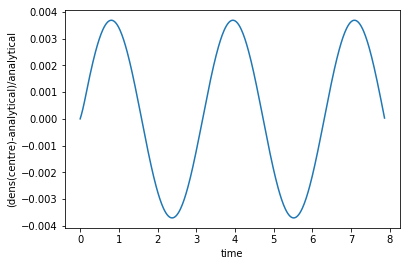

In [7]:
ds = yt.load("plt_gauss_quadpot00000")
ad = ds.all_data()
list0 = ad[("boxlib","AxDens")]
time0 = ds.current_time
xlo = ds.domain_left_edge[0]
xhi = ds.domain_right_edge[0]
boxsize = float(xhi - xlo)
N=int(int(len(list0))**(1/3)+0.5)
    
hbaroverm = 0.01917152/2.5
omega = 1.0
igp =0.0

## Analytical solution - quadtratic potential 
x_range = np.arange(float(xlo)+0.5*float(boxsize/N), float(xhi)+0.5*float(boxsize/N), float(boxsize/N))
ana_dens = [np.exp(-((x-igp)**2)*omega/hbaroverm)*np.sqrt(omega/np.pi/hbaroverm) for x in x_range]

list_snshots =np.arange(0,500)
times=[] 
center_diffs=[]

for s in list_snshots:
    ds = yt.load("plt_gauss_quadpot00"+str(s).zfill(3))
    ad = ds.all_data()
    list1 = ad[("boxlib","AxDens")]
    time1 = ds.current_time
    times.append(float(time1 - time0)) 


    density1 = np.zeros((N,N,N))

#     for i in range(0, N):
#         for j in range(0, N):
#             for k in range(0, N):
#                 density1[i,j,k]=list1[N*(N*i+k)+j]
            
    center_diffs.append((list1[N*(N*int(N/2)+int(N/2))+int(N/2)]-ana_dens[int(N/2)])/ana_dens[int(N/2)])

fig = plt.figure()
plt.plot(times, center_diffs)
plt.xlabel('time')
plt.ylabel('(dens(centre)-analytical)/analytical')